In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from statistics import mean 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_formats = ['svg']

In [2]:
data=pd.read_csv('dataset_31_credit-g.csv')

In [3]:
data

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,...,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,...,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,...,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,...,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,...,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,...,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,...,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,...,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,...,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [4]:
datafinal=data.drop('class',axis=1)

In [5]:
#%pip install category_encoders
import category_encoders as ce

In [6]:
encoder = ce.BinaryEncoder(cols=['checking_status','credit_history','purpose','savings_status','employment','personal_status','other_parties','property_magnitude','other_payment_plans','housing','job','own_telephone','foreign_worker'])
data_binary = encoder.fit_transform(datafinal)

In [7]:
from sklearn.preprocessing import LabelEncoder
#good=1, bad=0
y= data.iloc[:,-1].values 
ylabel=LabelEncoder()
y_num=ylabel.fit_transform(y)

In [8]:
x=data_binary.to_numpy()

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y_num, random_state=0, test_size=.20)

In [10]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler() 
x_train= sc.fit_transform(x_train) 
x_test= sc.transform(x_test)

In [11]:
#QDA
qda=QuadraticDiscriminantAnalysis()
best_QDA = np.mean(cross_val_score(qda,x_train,y_train,cv=10))
print('Best QDA classifier:',best_QDA)

Best QDA classifier: 0.67375


In [12]:
# LDA
lda = LinearDiscriminantAnalysis()
best_LDA = np.mean(cross_val_score(lda,x_train,y_train,cv=10))
print('Best LDA classifier:',best_LDA)


Best LDA classifier: 0.7600000000000001


Best n_neighbors in KNN model: 7 
Corresponding accuracy: 0.73


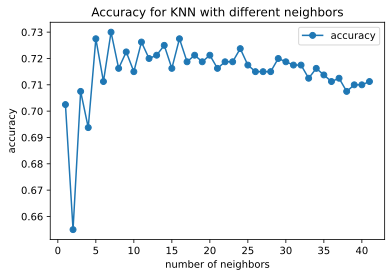

In [13]:
# KNN
k_list = np.arange(1,42)
knn_score=[]
for i in k_list:
    knn_model = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn_model, x_train, y_train,cv=4,scoring='accuracy')
    knn_score.append(np.mean(scores))

best_knn_score = np.max(knn_score)
best_knn = k_list[knn_score.index(best_knn_score)]
print('Best n_neighbors in KNN model:', best_knn, '\nCorresponding accuracy:',best_knn_score)
plt.plot(k_list,knn_score,'-o',label='accuracy')
plt.xlabel('number of neighbors')
plt.ylabel('accuracy')
plt.title('Accuracy for KNN with different neighbors')
plt.legend()
plt.show()

In [14]:
# GNB
gnb = GaussianNB()
best_GNB = np.mean(cross_val_score(gnb, x_train, y_train,cv=10))
print('Best Gaussian Naive Bayes classifier:',best_GNB)

Best Gaussian Naive Bayes classifier: 0.6925


Best n_estimator for Random Forest: 3 
Corresponding accuracy: 0.7425


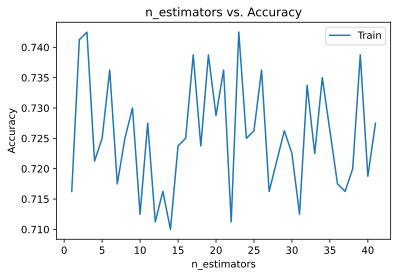

In [15]:
# Random Forest
rf_arru_1st_train=[]
n_estimator_1st = np.arange(1,42)

for k in n_estimator_1st:
    rf = RandomForestClassifier(k, max_depth=3)
    rf.fit(x_train,y_train)
    rf_arru_1st_train.append(rf.score(x_train,y_train))

best_acc = max(rf_arru_1st_train)
best_n_est = n_estimator_1st[rf_arru_1st_train.index(best_acc)]
print('Best n_estimator for Random Forest:', best_n_est, '\nCorresponding accuracy:', best_acc)


# plot the accuracies
plt.plot(n_estimator_1st, rf_arru_1st_train, label = "Train")
plt.xlabel('n_estimators')
plt.ylabel('Accuracy')
plt.title('n_estimators vs. Accuracy')
plt.legend()
plt.show()

In [16]:
# Decision Tree
score_DT = []
for depth in range(1,42):
    dt = DecisionTreeClassifier(max_depth=depth)
    score_DT.append(np.mean(cross_val_score(dt, x_train, y_train)))
best_DT=np.max(score_DT)
kDT= np.argmax(score_DT) + 1
print('Best decision tree classifier:', best_DT, 'for', kDT)

Best decision tree classifier: 0.7274999999999999 for 1


## Evaluation

#### Weighted Precision, Weighted Recall, Weighted F1

In [17]:
def display_metrics(classifier, y_test, x_test, name):
    y_pred = classifier.predict(x_test)
    result = precision_recall_fscore_support(y_test, y_pred, average='binary')
    print(f"| {name:>4}  |  {result[0]:7.4f}   |  {result[1]:7.4f}   |  {result[2]:7.4f}  |")
    print("-" * 48)

In [18]:
print(f"|       |  Weighted  |  Weighted  |  Weighted |")
print(f"| Model | Precision  |   Recall   |     F1    |")
print("-" * 48)
display_metrics(qda.fit(x_train,y_train), y_test, x_test, "QDA")
display_metrics(lda.fit(x_train,y_train), y_test, x_test, "LDA")
display_metrics(KNeighborsClassifier(n_neighbors=best_knn).fit(x_train,y_train), y_test, x_test, "KNN")
display_metrics(gnb.fit(x_train,y_train), y_test, x_test, "GNB")
display_metrics(RandomForestClassifier(best_n_est, max_depth=3).fit(x_train,y_train), y_test, x_test, "RF")
display_metrics(DecisionTreeClassifier(max_depth=kDT).fit(x_train,y_train), y_test, x_test, "DT")

|       |  Weighted  |  Weighted  |  Weighted |
| Model | Precision  |   Recall   |     F1    |
------------------------------------------------
|  QDA  |   0.8348   |   0.6761   |   0.7471  |
------------------------------------------------
|  LDA  |   0.8014   |   0.8239   |   0.8125  |
------------------------------------------------
|  KNN  |   0.7679   |   0.9085   |   0.8323  |
------------------------------------------------
|  GNB  |   0.8545   |   0.6620   |   0.7460  |
------------------------------------------------
|   RF  |   0.7188   |   0.9718   |   0.8263  |
------------------------------------------------
|   DT  |   0.7104   |   0.9155   |   0.8000  |
------------------------------------------------


#### Display Confusion matrices

In [19]:
def display_confusion_matrix(classifier, y_test, x_test, name):
    plot_confusion_matrix(classifier, x_test, y_test)
    plt.title(f"Confusion for {name}")
    plt.show()

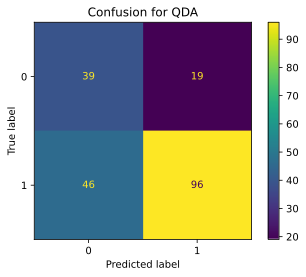

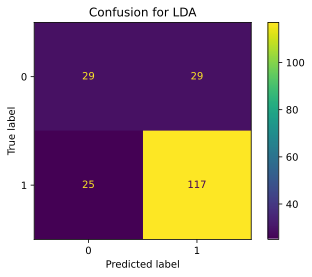

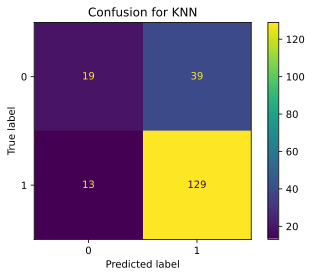

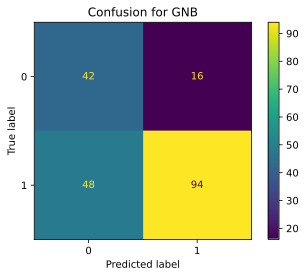

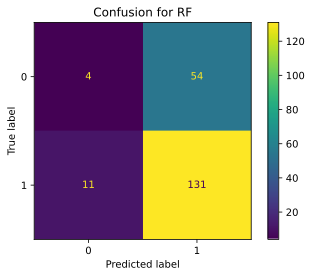

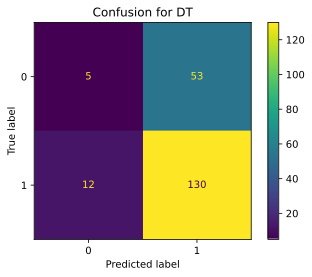

In [20]:
display_confusion_matrix(qda.fit(x_train,y_train), y_test, x_test, "QDA")
display_confusion_matrix(lda.fit(x_train,y_train), y_test, x_test, "LDA")
display_confusion_matrix(KNeighborsClassifier(n_neighbors=best_knn).fit(x_train,y_train), y_test, x_test, "KNN")
display_confusion_matrix(gnb.fit(x_train,y_train), y_test, x_test, "GNB")
display_confusion_matrix(RandomForestClassifier(best_n_est, max_depth=3).fit(x_train,y_train), y_test, x_test, "RF")
display_confusion_matrix(DecisionTreeClassifier(max_depth=kDT).fit(x_train,y_train), y_test, x_test, "DT")

#### Display ROC Curve

In [21]:
def plot_roc(classifier, y_test, x_test, name):
    y_pred = classifier.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=f"{name:>3} auc={auc(fpr, tpr):.3f}")

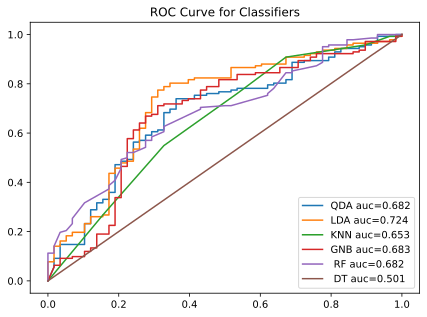

In [22]:
plt.figure(figsize=(7,5))
plot_roc(qda.fit(x_train,y_train), y_test, x_test, "QDA")
plot_roc(lda.fit(x_train,y_train), y_test, x_test, "LDA")
plot_roc(KNeighborsClassifier(n_neighbors=best_knn).fit(x_train,y_train), y_test, x_test, "KNN")
plot_roc(gnb.fit(x_train,y_train), y_test, x_test, "GNB")
plot_roc(RandomForestClassifier(best_n_est, max_depth=3).fit(x_train,y_train), y_test, x_test, "RF")
plot_roc(DecisionTreeClassifier(max_depth=kDT).fit(x_train,y_train), y_test, x_test, "DT")

plt.legend()
plt.title("ROC Curve for Classifiers")
plt.show()

#### Display PR Curve

In [23]:
def plot_prc(classifier, y_test, x_test, name):
    y_pred = classifier.predict_proba(x_test)[:,1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.plot(recall, precision, label=f"{name:>3} auc={auc(recall, precision):.3f}")

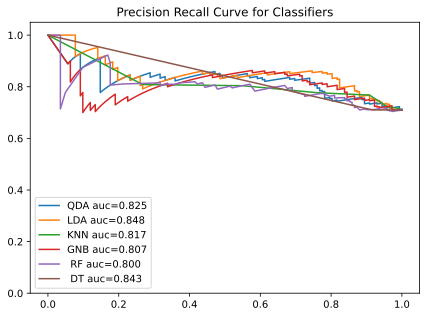

In [24]:
plt.figure(figsize=(7,5))
plot_prc(qda.fit(x_train,y_train), y_test, x_test, "QDA")
plot_prc(lda.fit(x_train,y_train), y_test, x_test, "LDA")
plot_prc(KNeighborsClassifier(n_neighbors=best_knn).fit(x_train,y_train), y_test, x_test, "KNN")
plot_prc(gnb.fit(x_train,y_train), y_test, x_test, "GNB")
plot_prc(RandomForestClassifier(best_n_est, max_depth=3).fit(x_train,y_train), y_test, x_test, "RF")
plot_prc(DecisionTreeClassifier(max_depth=kDT).fit(x_train,y_train), y_test, x_test, "DT")

plt.legend()
plt.ylim(0, 1.05)
plt.title("Precision Recall Curve for Classifiers")
plt.show()

In [25]:
rf = RandomForestClassifier(best_n_est, max_depth=3).fit(x_train,y_train).feature_importances_
dt = DecisionTreeClassifier(max_depth=kDT).fit(x_train,y_train).feature_importances_
gb = GradientBoostingClassifier(random_state=0).fit(x_train, y_train).feature_importances_
ab = AdaBoostClassifier(random_state=0).fit(x_train, y_train).feature_importances_
et = ExtraTreesClassifier(random_state=0).fit(x_train, y_train).feature_importances_

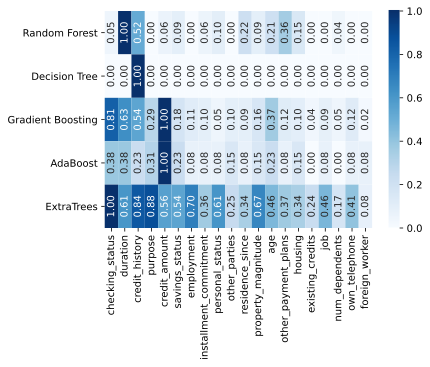

In [31]:
names        = list(data.columns.to_numpy())
names.remove('class')
encoded_name = list(data_binary.columns.to_numpy())

classifierN  = ['Random Forest', 'Decision Tree', 'Gradient Boosting', 'AdaBoost', 'ExtraTrees']

importance = np.zeros((len(classifierN), len(names)))

for idx, col in enumerate(names):
    for idx2, encol in enumerate(encoded_name):
        if col in encol:
            importance[0, idx] += rf[idx2]
            importance[1, idx] += dt[idx2]
            importance[2, idx] += gb[idx2]
            importance[3, idx] += ab[idx2]
            importance[4, idx] += et[idx2]

importance = importance / np.max(importance, axis=1, keepdims=True)

sns.heatmap(importance, cmap='Blues', xticklabels=names, yticklabels=classifierN, square=False, annot=True, fmt=".2f", annot_kws={"rotation": "vertical"})
plt.yticks(rotation=0) 
plt.show()